# Analysis of TCRB J gene usage in COVID data set

This notebook shows an analysis of the J gene usage in the Adaptive TCR COVID study of 1,414 individuals. The main finding is that there is a large variation in the relative usage of the J1 and J2 families, but that the relative usage of the genes within the families is fairly consistent. In other words, the variation in the J gene family usage is driven by a systematic shift in the use of all genes within the family rather than differential use of a specific gene.

This conclusion was reached by looking at the relation between the usage of the individual J genes and the relative usage of the J1 and J2 families (J1/J2 ratio). This was done for both the *total* and *normalized* J gene usage.

+ total usage = # TCRBs using a given J gene / total number of TCRB sequences
+ normalized usage = # TCRBs using a given J gene / number of TCRB sequences in J gene family

TCRB data is available at https://clients.adaptivebiotech.com/pub/covid-2020

In [1]:
%matplotlib inline
import matplotlib as mpl
mpl.get_backend()

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LinearRegression

In [2]:
tcrb = pd.read_csv('covid-tcrbj.csv')

In [3]:
jgenes = ['TCRBJ01-01', 'TCRBJ01-02', 'TCRBJ01-03', 
          'TCRBJ01-04', 'TCRBJ01-05', 'TCRBJ01-06', 
          'TCRBJ02-01', 'TCRBJ02-02', 'TCRBJ02-03',
          'TCRBJ02-04', 'TCRBJ02-05', 'TCRBJ02-06',
          'TCRBJ02-07']

## Histogram of J1/J2 usage

A histogram of J1/J2 usage shows a broad distribution from about 0.4 to 1.5, with a few outliers at either extreme. Histograms of normalized J gene usage are relatively narrow.

### Histogram of J1/J2 usage

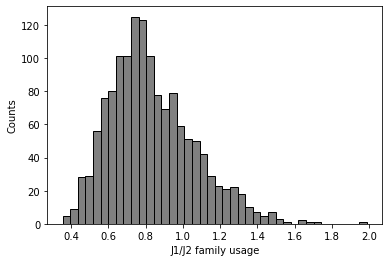

In [4]:
f, ax = plt.subplots()
ax.set_xlabel('J1/J2 family usage')
ax.set_ylabel('Counts')
ax.hist(tcrb['J1/J2'], bins=40, cumulative=False, edgecolor='black', color='gray')
plt.show()

### Histograms of normalized J gene usage

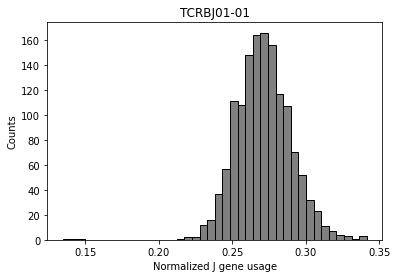

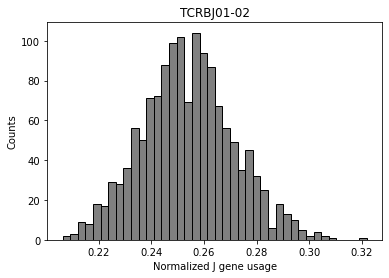

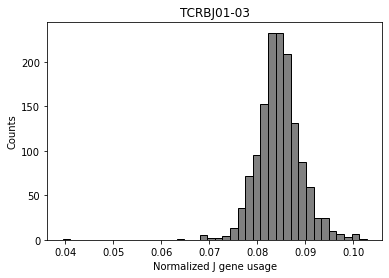

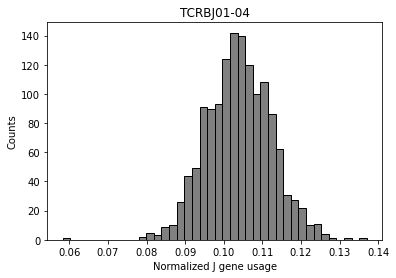

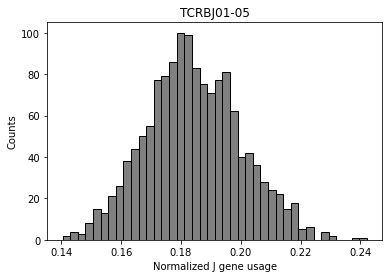

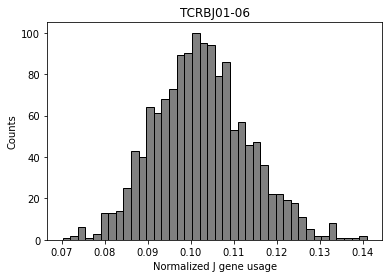

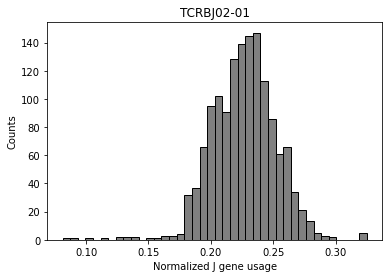

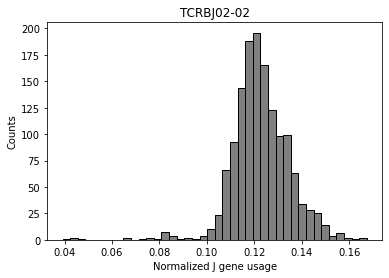

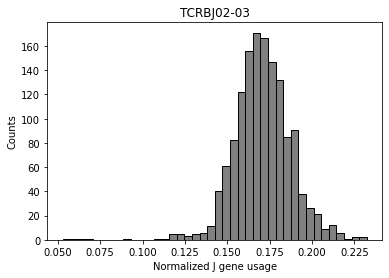

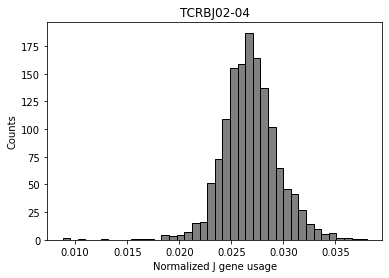

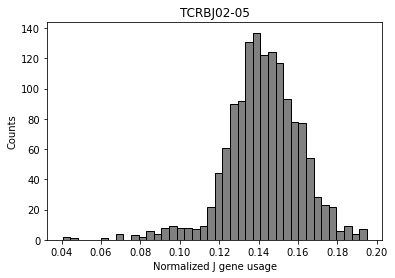

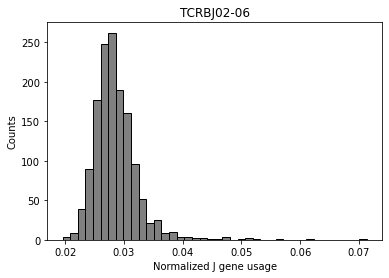

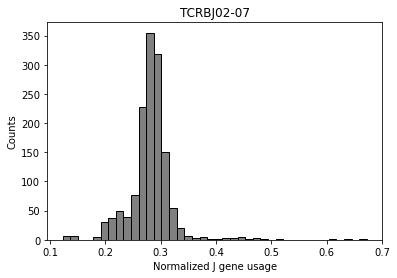

In [5]:
for jgene in jgenes:
    
    # Set column names
    total = jgene + '/j1j2'
    if 'TCRBJ01' in jgene:
        normalized = jgene + '/j1'
    else:
        normalized = jgene + '/j2'
        
    f, ax = plt.subplots()    
    ax.set_title(jgene)
    ax.set_xlabel('Normalized J gene usage')
    ax.set_ylabel('Counts')
    ax.hist(tcrb[normalized], bins=40, cumulative=False, edgecolor='black', color='gray')
    plt.show()

## Linear regression

Linear regression analysis quantifies the relation between the usage of the individual J genes and the relative usage of the J1 and J2 families (J1/J2 ratio).

The results show strong relationships between the total usage of most J genes and the J1/J2 ratio, but very weak relationships between the normalized usage of the J genes.


In [6]:
model_normalized = LinearRegression()
model_total = LinearRegression()
print('jgene       usage   Rsq(tot)   Rsq(norm)')

for jgene in jgenes:
    
    # Set column names
    total = jgene + '/j1j2'
    if 'TCRBJ01' in jgene:
        normalized = jgene + '/j1'
    else:
        normalized = jgene + '/j2'
        
    x = np.array(tcrb['J1/J2']).reshape(-1, 1)
    y = np.array(tcrb[normalized])
    model_normalized.fit(x,y)
    r_sq_normalized = model_normalized.score(x, y)
    
    x = np.array(tcrb['J1/J2']).reshape(-1, 1)
    y = np.array(tcrb[total])
    model_total.fit(x,y)
    r_sq_total = model_total.score(x, y)
    
    print('{0}  {1:.4f}  {2:.4f}     {3:.4f}'.format(jgene, tcrb[total].mean(), 
                                            r_sq_total, r_sq_normalized))

jgene       usage   Rsq(tot)   Rsq(norm)
TCRBJ01-01  0.1211  0.8350     0.0341
TCRBJ01-02  0.1137  0.8741     0.1816
TCRBJ01-03  0.0377  0.8512     0.0026
TCRBJ01-04  0.0461  0.6648     0.1766
TCRBJ01-05  0.0817  0.6209     0.2291
TCRBJ01-06  0.0457  0.6174     0.0001
TCRBJ02-01  0.1258  0.6155     0.0519
TCRBJ02-02  0.0676  0.4277     0.1723
TCRBJ02-03  0.0943  0.4990     0.0420
TCRBJ02-04  0.0149  0.5687     0.0000
TCRBJ02-05  0.0787  0.3533     0.0292
TCRBJ02-06  0.0157  0.2687     0.1003
TCRBJ02-07  0.1565  0.5015     0.0305


## Plots of total and relative J gene usage vs. J1/J2

The following set of 13 scatter plots show the total (blue) and normalize (green) J gene usage vs. the J1/J2 family usage ratio. Each dot represents one subject.

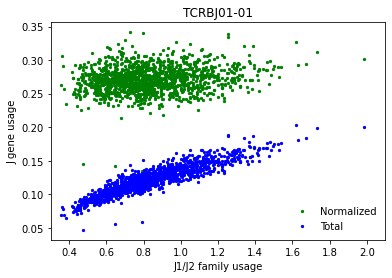

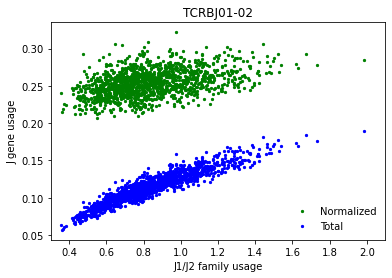

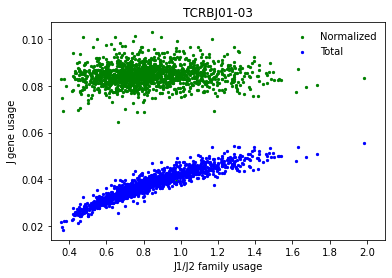

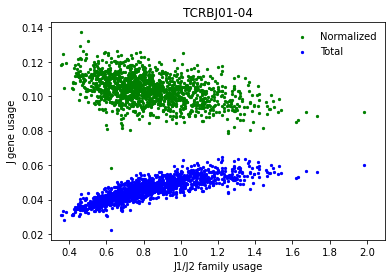

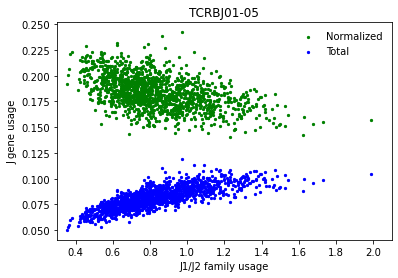

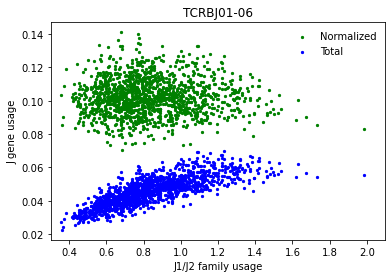

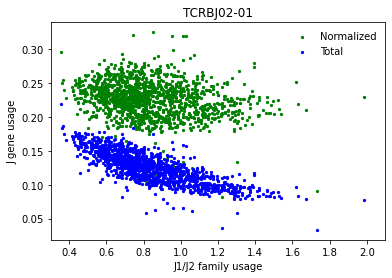

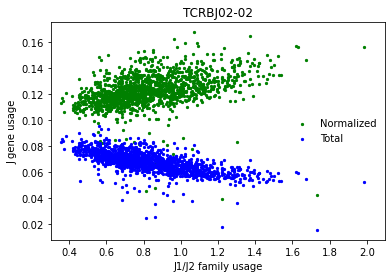

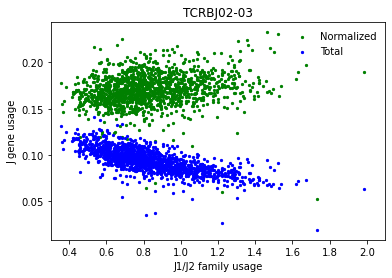

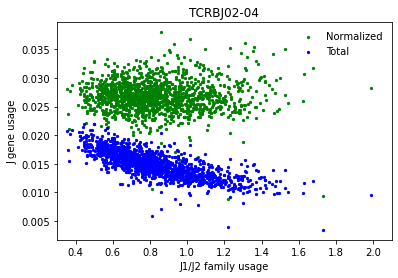

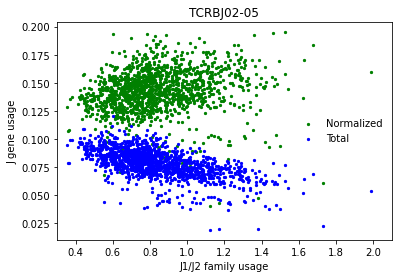

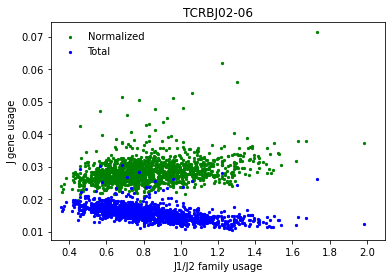

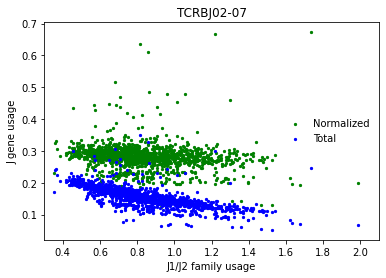

In [7]:
for jgene in jgenes:
    
    # Set column names
    total = jgene + '/j1j2'
    if 'TCRBJ01' in jgene:
        normalized = jgene + '/j1'
    else:
        normalized = jgene + '/j2'
    
    f, ax = plt.subplots()
    ax.set_title(jgene)
    ax.set_xlabel('J1/J2 family usage')
    ax.set_ylabel('J gene usage')
    ax.set_xlim(0.3, 2.1)
    #ax.set_ylim(0.0, 0.5)
    ax.scatter(tcrb['J1/J2'], tcrb[normalized], c='green', s=5, label='Normalized')
    ax.scatter(tcrb['J1/J2'], tcrb[total], c='blue', s=5, label='Total')
    ax.legend(frameon=False)
    plt.show()